#### Practicle Simple Linear Regression

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv('data.csv')

In [46]:
df.head()

,Height (Inches),Weight (Pounds)
0,63.0,123.5
1,63.4,137.2
2,63.9,129.5
3,64.3,121.1
4,64.8,128.6


In [47]:
df.tail()

,Height (Inches),Weight (Pounds)
25,74.2,195.4
26,74.7,179.0
27,75.1,163.9
28,75.6,179.5
29,76.0,181.1


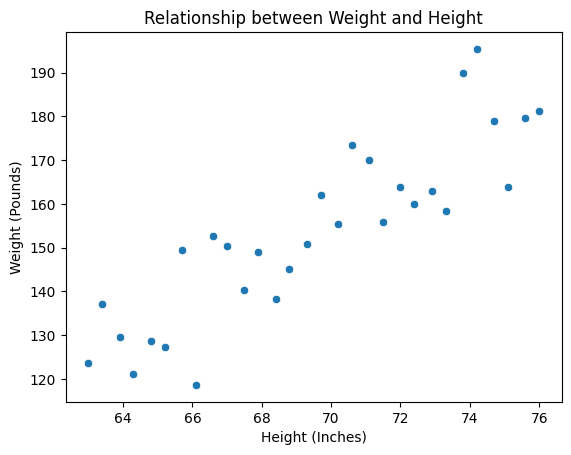

In [48]:
sns.scatterplot(data=df, x=df['Height (Inches)'], y=df['Weight (Pounds)'])
plt.title('Relationship between Weight and Height')
plt.show()

We can see that the two variable Height(independent) and Weight(dependent) are related Linearly. Which means when Height increases the weight will also increase.

In [49]:
df.corr()

,Height (Inches),Weight (Pounds)
Height (Inches),1.000000,0.877537
Weight (Pounds),0.877537,1.000000


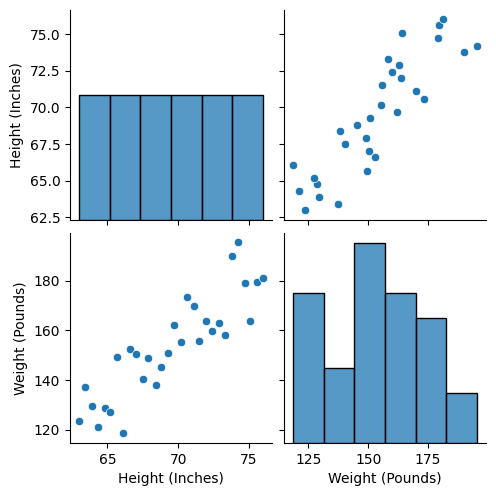

In [50]:
sns.pairplot(data=df)
plt.show()

A Strong Linear Positive correlation exists which means we can use linear regression model to train on this data. There are no extreme outliers.

---

##### Seperate Independent Features and Dependent Feature:

In [51]:
# When seperating independent feature from dependent one thing we need to ensure that it is in DataFrame Format and not Series because in case of simple linear regression its ok since there's only one feature but when we perform multiple linear regression we will face problems in sklearn model as its expects in independent feature to be a dataframw.

#* X is a conventional name for independent variables
X = df[['Height (Inches)']]

# In case of Dependent feature we only need or have a single feature (output) so it needs to be series or 1D array.
y = df['Weight (Pounds)']

---

##### Train-Test Split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [54]:
print(f'X_train = {X_train.shape}')
print(f'y_train = {y_train.shape}')
print(f'X_test = {X_test.shape}')
print(f'y_test = {y_test.shape}')

X_train = (22, 1)
y_train = (22,)
X_test = (8, 1)
y_test = (8,)


Using sklean's `train_test_split` function we will have the data divided into 2 parts: `Train_dataset` and `Test_dataset` with 25% of the values in `Test_dataset` (8 values out of 30) and 75% of the values in the `Train_dataset` (22 values out of 30)

After splitting the data in train and test we will merge the `X_train`,` y_train` as `Train_dataset` and `X_test`,`y_test` as `Test_dataset`.

---

##### Standardization using z-score:

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()

In [57]:
# from train data we use fit_transform and for test data we use transform only to avoid data leaking.

X_train = scaler.fit_transform(X_train)
X_train

array([[-0.10034021],
       [-1.50274214],
       [-1.03527483],
       [ 0.36712711],
       [-0.9313932 ],
       [ 0.00354142],
       [-0.23019224],
       [ 1.06832807],
       [-1.39886052],
       [-1.26900848],
       [ 1.40594335],
       [-1.16512686],
       [ 0.93847604],
       [ 1.53579538],
       [ 0.60086076],
       [ 1.87341067],
       [ 0.83459442],
       [-0.69765955],
       [-0.33407386],
       [ 0.13339345],
       [ 0.70474239],
       [-0.80154117]])

In [58]:
#* For test we only use transform
X_test = scaler.transform(X_test)
X_test

array([[ 1.63967701],
       [ 0.23727507],
       [ 1.1722097 ],
       [ 0.47100873],
       [-0.56780752],
       [-0.46392589],
       [ 1.76952904],
       [ 1.30206173]])

---

##### Apply Simple Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regression = LinearRegression()

In [61]:
regression.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [62]:
print(f'Coefficient or Slope: {regression.coef_}')
print(f'Intercept: {regression.intercept_}')

Coefficient or Slope: [18.50794949]
Intercept: 149.1727272727273


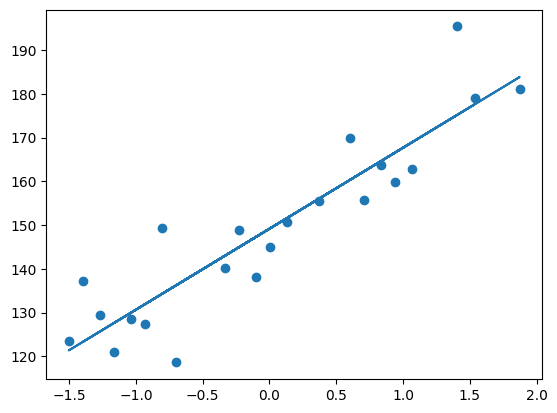

In [63]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train))

plt.show()

##### Prediction of test data
1. predicted height output = intercept_ + coef_ (weights)
2. y_pred_test = 149.17 + 18.50(X_test)

In [64]:
### Prediction for test data
y_pred = regression.predict(X_test)
y_pred

array([179.51978654, 153.56420237, 170.86792515, 157.89013307,
       138.66377442, 140.58641029, 181.92308137, 173.27121998])

##### Performance Metrices


In [65]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [66]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 160.511309234149
Mean Absolute Error: 11.854381616590643
Root Mean Squared Error: 12.669305791326886


In [67]:
# R squared

# Formula:
# R^2 = 1 - SSR/SST

# Coefficient of determination = sum of squares of residuals - total sum of squares

from sklearn.metrics import r2_score

In [68]:
score = r2_score(y_test, y_pred)
print(score)

0.016835337169989417


In [69]:
# Adjusted R^2 = 1-[(1-R^2) * (n-1) / (n-k-1)]

# Where:
# R^2 = The R^2 of the model
# n = The number of observations
# k = The number of predictor varibles

1 - (1-score) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)

-0.14702543996834572

Linear Regression using OLS

In [70]:
import statsmodels.api as sm

In [71]:
model = sm.OLS(y_train, X_train).fit()

In [72]:
model.predict(X_test)

array([ 30.34705927,   4.3914751 ,  21.69519788,   8.71740579,
       -10.50895285,  -8.58631699,  32.7503541 ,  24.09849271])

In [73]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:        Weight (Pounds)   R-squared (uncentered):                   0.015
Model:                            OLS   Adj. R-squared (uncentered):             -0.032
Method:                 Least Squares   F-statistic:                             0.3222
Date:                Sun, 14 Dec 2025   Prob (F-statistic):                       0.576
Time:                        14:19:46   Log-Likelihood:                         -141.36
No. Observations:                  22   AIC:                                      284.7
Df Residuals:                      21   BIC:                                      285.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [75]:
# Prediction for new data
new_weight = scaler.transform([[72]])
regression.predict(new_weight)

c:\Users\ASUS\anaconda3\envs\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([164.61935859])